In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
# Replace 'heart_disease.csv' with your actual file path
df = pd.read_csv('dataset/heart_disease_health_indicators_BRFSS2015.csv')
df = df.drop(columns=['NoDocbcCost', 'CholCheck'])

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Total records: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]}")

Dataset loaded successfully!
Shape: (253680, 20)
Total records: 253,680
Total features: 20


In [2]:
print("=" * 80)
print("BASIC DATASET INFORMATION")
print("=" * 80)

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

print("\n" + "=" * 80)
print("COLUMN NAMES")
print("=" * 80)
print(df.columns.tolist())

print("\n" + "=" * 80)
print("DATA TYPES")
print("=" * 80)
print(df.dtypes)

print("\n" + "=" * 80)
print("DATASET INFO")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("BASIC STATISTICS")
print("=" * 80)
print(df.describe())

BASIC DATASET INFORMATION

First 5 rows:
   HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Stroke  Diabetes  \
0                   0.0     1.0       1.0  40.0     1.0     0.0       0.0   
1                   0.0     0.0       0.0  25.0     1.0     0.0       0.0   
2                   0.0     1.0       1.0  28.0     0.0     0.0       0.0   
3                   0.0     1.0       0.0  27.0     0.0     0.0       0.0   
4                   0.0     1.0       1.0  24.0     0.0     0.0       0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  GenHlth  \
0           0.0     0.0      1.0                0.0            1.0      5.0   
1           1.0     0.0      0.0                0.0            0.0      3.0   
2           0.0     1.0      0.0                0.0            1.0      5.0   
3           1.0     1.0      1.0                0.0            1.0      2.0   
4           1.0     1.0      1.0                0.0            1.0      2.0   

   MentHlth  PhysHlth

In [3]:
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

# Calculate missing values
missing_values = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})

missing_values = missing_values[missing_values['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

if len(missing_values) > 0:
    print("\nColumns with missing values:")
    print(missing_values.to_string(index=False))
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    plt.barh(missing_values['Column'], missing_values['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing values found in the dataset!")

# Check for any placeholder values that might represent missing data
print("\n" + "=" * 80)
print("CHECKING FOR POTENTIAL PLACEHOLDER VALUES")
print("=" * 80)

for col in df.columns:
    unique_vals = df[col].unique()
    if len(unique_vals) < 20:  # Only for categorical or limited value columns
        print(f"\n{col}: {sorted(unique_vals)}")

MISSING VALUES ANALYSIS

✓ No missing values found in the dataset!

CHECKING FOR POTENTIAL PLACEHOLDER VALUES

HeartDiseaseorAttack: [0.0, 1.0]

HighBP: [0.0, 1.0]

HighChol: [0.0, 1.0]

Smoker: [0.0, 1.0]

Stroke: [0.0, 1.0]

Diabetes: [0.0, 1.0, 2.0]

PhysActivity: [0.0, 1.0]

Fruits: [0.0, 1.0]

Veggies: [0.0, 1.0]

HvyAlcoholConsump: [0.0, 1.0]

AnyHealthcare: [0.0, 1.0]

GenHlth: [1.0, 2.0, 3.0, 4.0, 5.0]

DiffWalk: [0.0, 1.0]

Sex: [0.0, 1.0]

Age: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]

Education: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

Income: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


In [4]:
print("=" * 80)
print("DUPLICATE RECORDS ANALYSIS")
print("=" * 80)

# Check for complete duplicates
duplicates = df.duplicated().sum()
print(f"\nTotal duplicate rows: {duplicates:,}")
print(f"Percentage of duplicates: {(duplicates/len(df)*100):.2f}%")

if duplicates > 0:
    print("\nSample of duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))
    
    # Remove duplicates
    df_cleaned = df.drop_duplicates()
    print(f"\nAfter removing duplicates:")
    print(f"Original shape: {df.shape}")
    print(f"New shape: {df_cleaned.shape}")
    print(f"Rows removed: {df.shape[0] - df_cleaned.shape[0]:,}")
    
    # Update the dataframe
    df = df_cleaned.copy()
else:
    print("\n✓ No duplicate rows found!")

print(f"\nFinal dataset shape: {df.shape}")

DUPLICATE RECORDS ANALYSIS

Total duplicate rows: 25,847
Percentage of duplicates: 10.19%

Sample of duplicate rows:


     HeartDiseaseorAttack  HighBP  HighChol   BMI  Smoker  Stroke  Diabetes  \
5                     0.0     1.0       1.0  25.0     1.0     0.0       0.0   
25                    0.0     0.0       0.0  32.0     0.0     0.0       0.0   
29                    0.0     0.0       1.0  31.0     1.0     0.0       0.0   
44                    0.0     0.0       1.0  31.0     1.0     0.0       0.0   
52                    0.0     1.0       1.0  27.0     1.0     0.0       2.0   
53                    0.0     0.0       0.0  31.0     0.0     0.0       0.0   
57                    0.0     0.0       1.0  24.0     1.0     0.0       0.0   
70                    0.0     1.0       1.0  27.0     1.0     0.0       0.0   
80                    0.0     1.0       0.0  28.0     0.0     0.0       0.0   
113                   0.0     1.0       0.0  27.0     0.0     0.0       0.0   

     PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  GenHlth  \
5             1.0     1.0      1.0               

TARGET VARIABLE ANALYSIS

Potential target columns: ['HeartDiseaseorAttack']

Using 'HeartDiseaseorAttack' as target variable

Class Distribution:
HeartDiseaseorAttack
0.0    204123
1.0     23710
Name: count, dtype: int64

Class Distribution (%):
HeartDiseaseorAttack
0.0    89.593255
1.0    10.406745
Name: proportion, dtype: float64


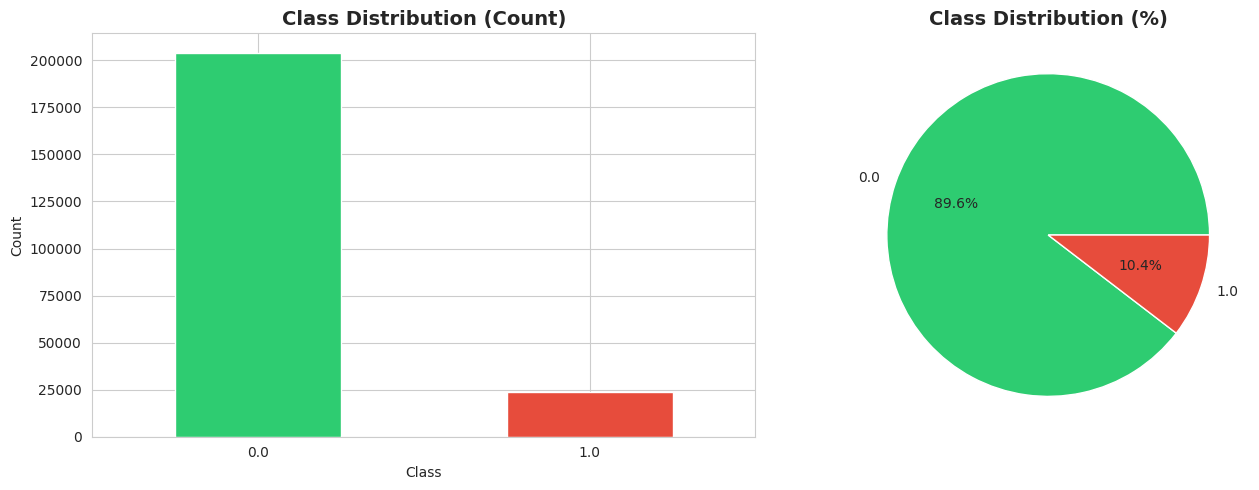


Class Imbalance Ratio: 8.61:1
⚠️  WARNING: Significant class imbalance detected!
   Consider using techniques like SMOTE, class weights, or stratified sampling.


In [5]:
print("=" * 80)
print("TARGET VARIABLE ANALYSIS")
print("=" * 80)

# Assuming the target variable is related to heart disease
# Common names: HeartDisease, HeartDiseaseorAttack, _MICHD, etc.
# Let's identify the target column

target_candidates = [col for col in df.columns if 'heart' in col.lower() 
                     or 'michd' in col.lower() or 'chd' in col.lower()]

print(f"\nPotential target columns: {target_candidates}")

# Assuming the first candidate or manually specify
if len(target_candidates) > 0:
    target_col = target_candidates[0]
else:
    # Manually specify based on your dataset
    target_col = df.columns[0]  # Replace with actual target column name

print(f"\nUsing '{target_col}' as target variable")

# Class distribution
print("\nClass Distribution:")
print(df[target_col].value_counts())
print("\nClass Distribution (%):")
print(df[target_col].value_counts(normalize=True) * 100)

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df[target_col].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                    colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Class Distribution (%)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Calculate imbalance ratio
class_counts = df[target_col].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print("⚠️  WARNING: Significant class imbalance detected!")
    print("   Consider using techniques like SMOTE, class weights, or stratified sampling.")

In [6]:
print("=" * 80)
print("FEATURE CATEGORIZATION")
print("=" * 80)

# Identify feature types
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target from features
if target_col in numerical_features:
    numerical_features.remove(target_col)
if target_col in categorical_features:
    categorical_features.remove(target_col)

print(f"\nNumerical Features ({len(numerical_features)}):")
print(numerical_features)

print(f"\nCategorical Features ({len(categorical_features)}):")
print(categorical_features)

# Further categorize numerical features based on unique values
binary_features = []
continuous_features = []

for col in numerical_features:
    unique_vals = df[col].nunique()
    if unique_vals == 2:
        binary_features.append(col)
    else:
        # Treat everything else as continuous (including BMI, Age, etc.)
        continuous_features.append(col)
        if unique_vals <= 20:
            print(f"\n{col} has {unique_vals} unique values: {sorted(df[col].unique())}")

print(f"\n" + "=" * 80)
print(f"Binary Features ({len(binary_features)}):")
print(binary_features)

print(f"\nContinuous Features ({len(continuous_features)}):")
print(continuous_features)

# Create a summary dictionary
feature_summary = {
    'Total Features': len(df.columns) - 1,  # Excluding target
    'Numerical': len(numerical_features),
    'Categorical': len(categorical_features),
    'Binary': len(binary_features),
    'Continuous': len(continuous_features)
}

print(f"\n" + "=" * 80)
print("FEATURE SUMMARY")
print("=" * 80)
for key, value in feature_summary.items():
    print(f"{key}: {value}")

FEATURE CATEGORIZATION

Numerical Features (19):
['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Categorical Features (0):
[]

Diabetes has 3 unique values: [0.0, 1.0, 2.0]

GenHlth has 5 unique values: [1.0, 2.0, 3.0, 4.0, 5.0]

Age has 13 unique values: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]

Education has 6 unique values: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

Income has 8 unique values: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

Binary Features (11):
['HighBP', 'HighChol', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'DiffWalk', 'Sex']

Continuous Features (8):
['BMI', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

FEATURE SUMMARY
Total Features: 19
Numerical: 19
Categorical: 0
Binary: 11
Continuous: 8


FEATURE IMPORTANCE ANALYSIS

1. CORRELATION WITH TARGET (Absolute Values)
--------------------------------------------------------------------------------
GenHlth              0.258383
Age                  0.221618
DiffWalk             0.212709
HighBP               0.209361
Stroke               0.203002
PhysHlth             0.181698
HighChol             0.180765
Diabetes             0.180272
Income               0.141011
Smoker               0.114441
Education            0.099600
PhysActivity         0.087299
Sex                  0.086096
MentHlth             0.064621
BMI                  0.052904
CholCheck            0.044206
Veggies              0.039167
NoDocbcCost          0.031000
HvyAlcoholConsump    0.028991
Fruits               0.019790
AnyHealthcare        0.018734
Name: HeartDiseaseorAttack, dtype: float64


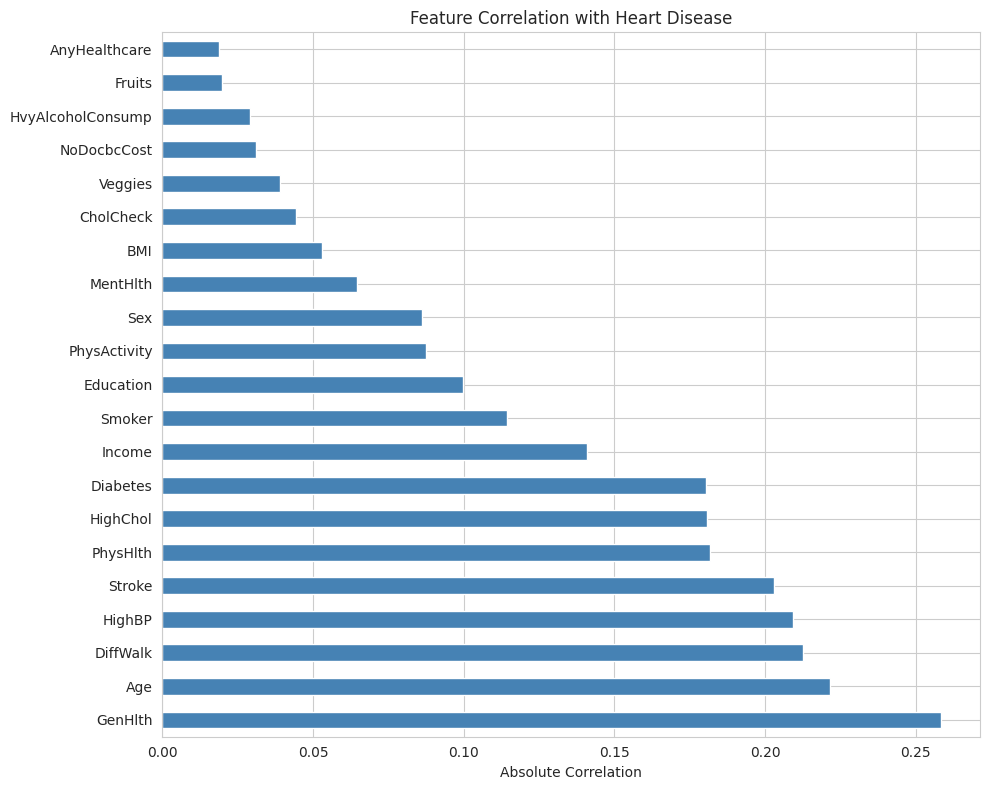


2. RANDOM FOREST FEATURE IMPORTANCE
--------------------------------------------------------------------------------
BMI                  0.191022
Age                  0.110573
Income               0.102895
PhysHlth             0.085617
Education            0.073188
GenHlth              0.069885
MentHlth             0.063873
Fruits               0.033097
Diabetes             0.028834
PhysActivity         0.027980
Stroke               0.027661
HighBP               0.027185
Veggies              0.026968
DiffWalk             0.024895
HighChol             0.024129
Sex                  0.023964
Smoker               0.021941
NoDocbcCost          0.015212
HvyAlcoholConsump    0.009331
AnyHealthcare        0.007777
CholCheck            0.003973
dtype: float64


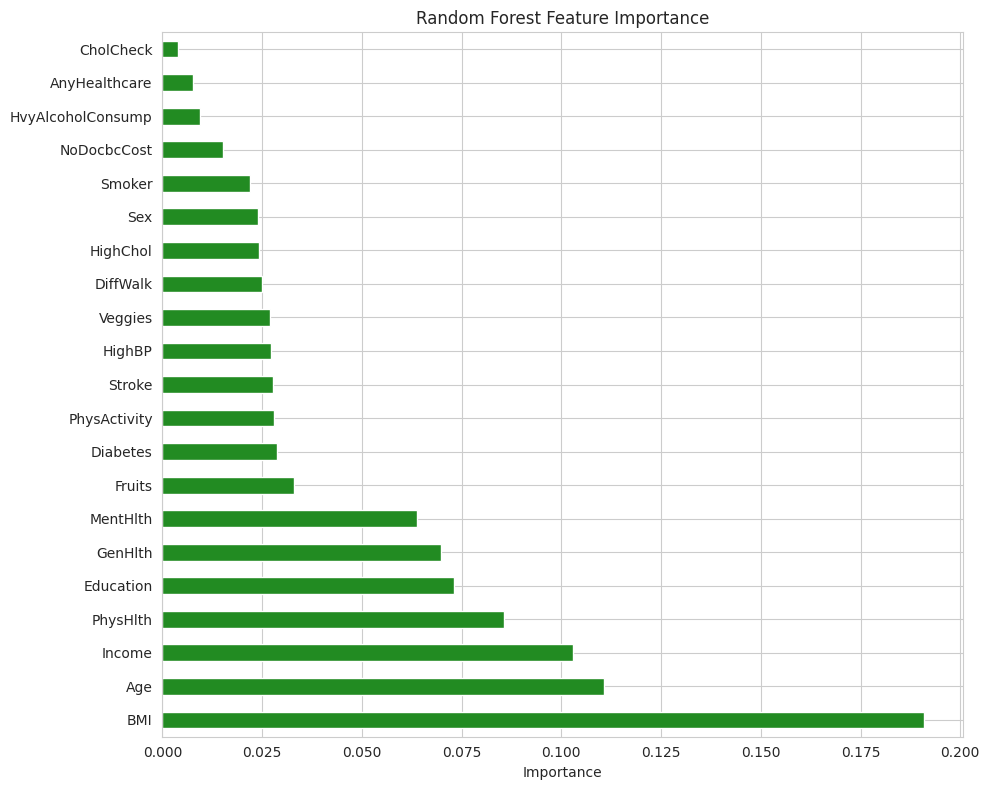


3. PERMUTATION IMPORTANCE (Most Reliable)
--------------------------------------------------------------------------------
GenHlth              0.001898
Stroke               0.001470
CholCheck            0.000010
Diabetes             0.000006
Sex                 -0.000020
HvyAlcoholConsump   -0.000095
MentHlth            -0.000124
Age                 -0.000128
AnyHealthcare       -0.000162
NoDocbcCost         -0.000164
Fruits              -0.000203
Veggies             -0.000309
HighChol            -0.000438
Smoker              -0.000451
BMI                 -0.000542
PhysHlth            -0.000599
Education           -0.000637
PhysActivity        -0.000670
DiffWalk            -0.000733
Income              -0.001094
HighBP              -0.001141
dtype: float64


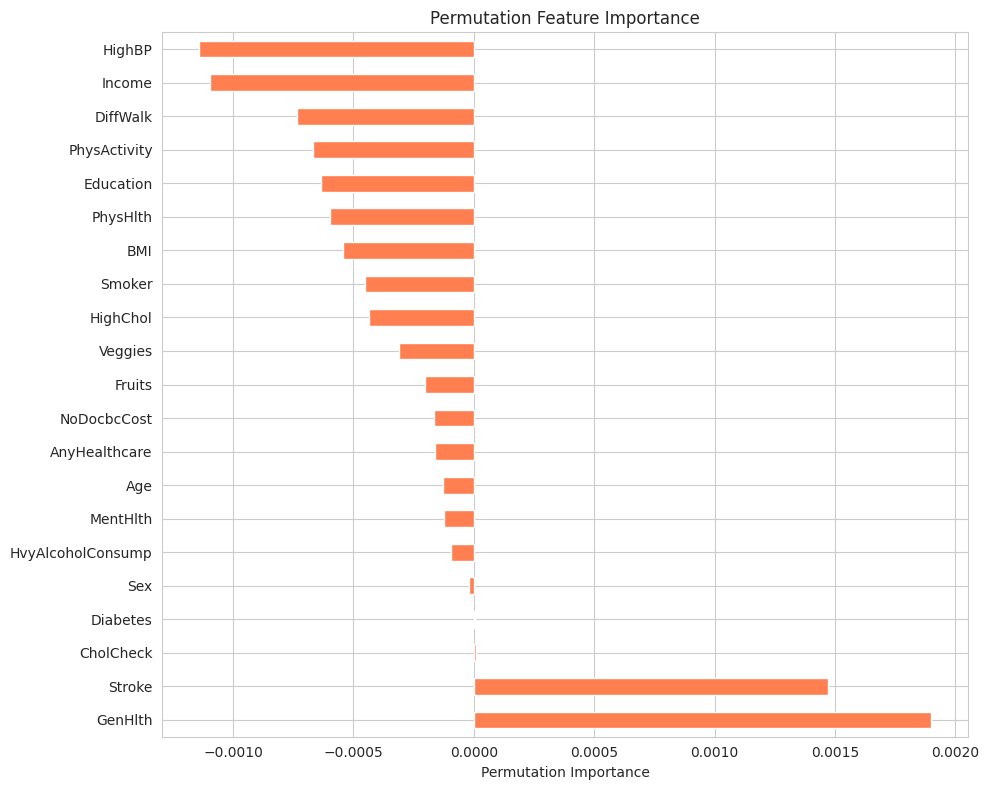


4. LOGISTIC REGRESSION COEFFICIENTS
--------------------------------------------------------------------------------
Age                  1.029138
Stroke               0.977713
Sex                  0.771778
HighChol             0.611180
HighBP               0.526445
GenHlth              0.489531
CholCheck            0.441029
Smoker               0.370232
HvyAlcoholConsump    0.328377
DiffWalk             0.297922
NoDocbcCost          0.218340
Diabetes             0.139837
Income               0.135369
Veggies              0.057532
PhysActivity         0.042330
Education            0.032182
AnyHealthcare        0.022842
BMI                  0.014041
MentHlth             0.006586
Fruits               0.005738
PhysHlth             0.004109
dtype: float64


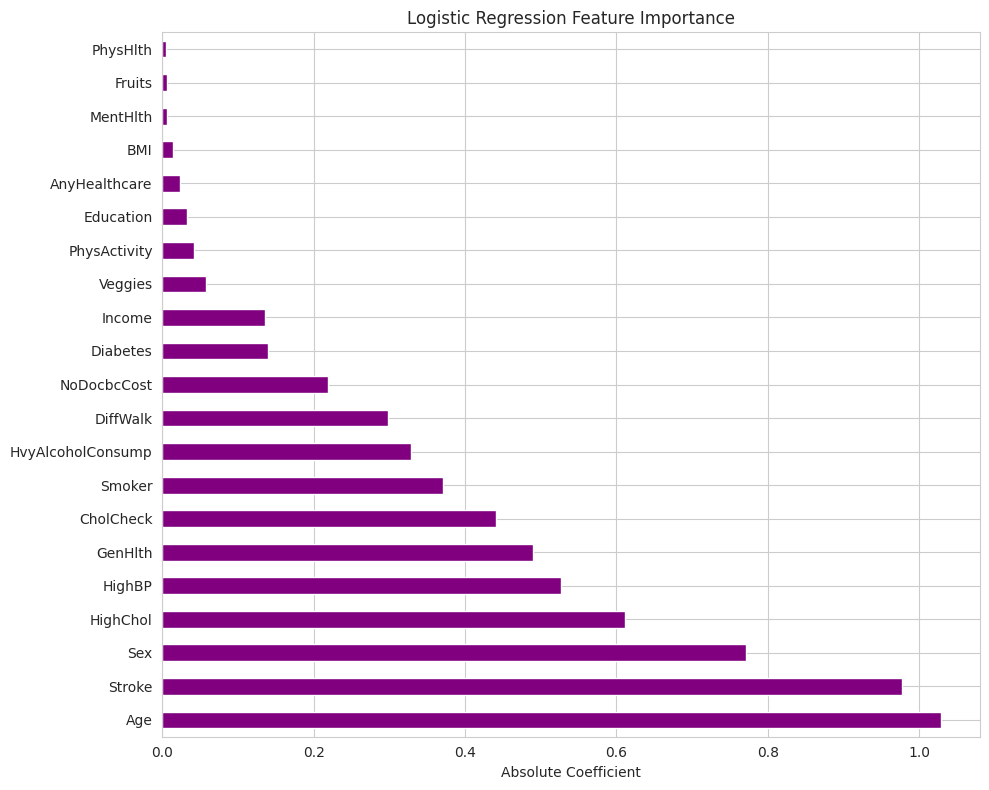


TOP 10 MOST IMPORTANT FEATURES (SUMMARY)

Top 10 Features (by average rank across all methods):
          Correlation  RF_Importance  Perm_Importance  LR_Coefficient  \
Age          0.221618       0.110573        -0.000128        1.029138   
GenHlth      0.258383       0.069885         0.001898        0.489531   
Stroke       0.203002       0.027661         0.001470        0.977713   
Diabetes     0.180272       0.028834         0.000006        0.139837   
Sex          0.086096       0.023964        -0.000020        0.771778   
HighChol     0.180765       0.024129        -0.000438        0.611180   
HighBP       0.209361       0.027185        -0.001141        0.526445   
Income       0.141011       0.102895        -0.001094        0.135369   
DiffWalk     0.212709       0.024895        -0.000733        0.297922   
PhysHlth     0.181698       0.085617        -0.000599        0.004109   

          Avg_Rank  
Age           3.25  
GenHlth       3.50  
Stroke        5.00  
Diabetes      8

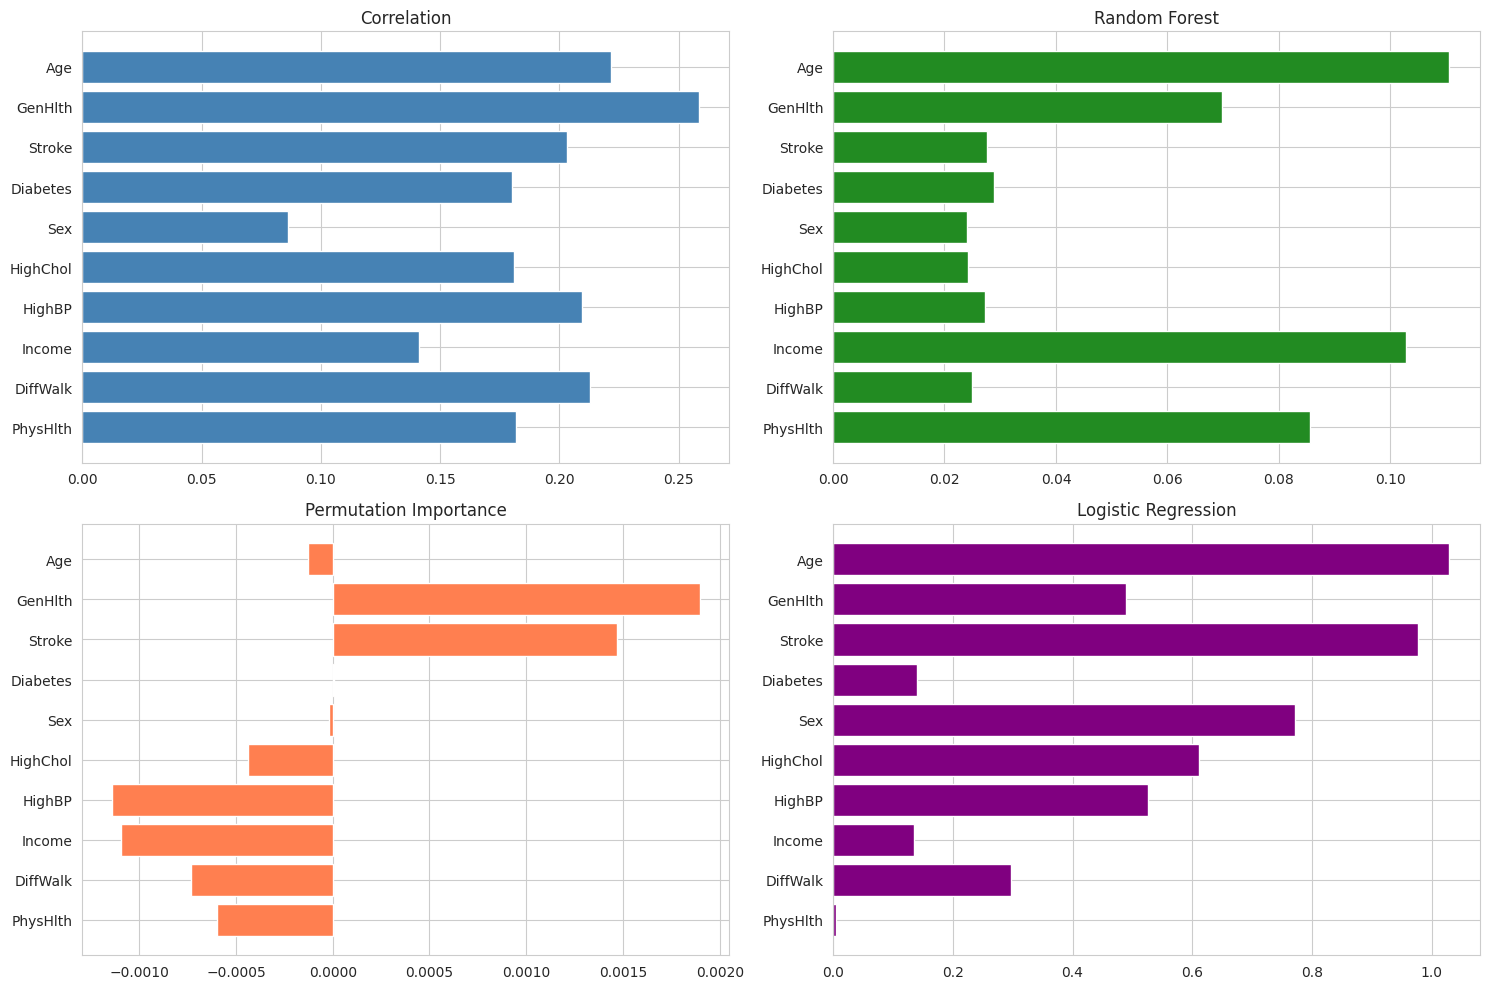


✓ Feature importance analysis complete!


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Load and prepare data
df = pd.read_csv('dataset/heart_disease_health_indicators_BRFSS2015.csv')
target_col = 'HeartDiseaseorAttack'

X = df.drop(columns=[target_col])
y = df[target_col]

# Scale features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Method 1: Correlation with Target
print("\n1. CORRELATION WITH TARGET (Absolute Values)")
print("-" * 80)
correlations = df.corr()[target_col].drop(target_col).abs().sort_values(ascending=False)
print(correlations)

plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color='steelblue')
plt.xlabel('Absolute Correlation')
plt.title('Feature Correlation with Heart Disease')
plt.tight_layout()
plt.show()

# Method 2: Random Forest Feature Importance
print("\n2. RANDOM FOREST FEATURE IMPORTANCE")
print("-" * 80)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(rf_importance)

plt.figure(figsize=(10, 8))
rf_importance.plot(kind='barh', color='forestgreen')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Method 3: Permutation Importance (most reliable)
print("\n3. PERMUTATION IMPORTANCE (Most Reliable)")
print("-" * 80)
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_imp_df = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print(perm_imp_df)

plt.figure(figsize=(10, 8))
perm_imp_df.plot(kind='barh', color='coral')
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

# Method 4: Logistic Regression Coefficients
print("\n4. LOGISTIC REGRESSION COEFFICIENTS")
print("-" * 80)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

lr_coef = pd.Series(np.abs(lr.coef_[0]), index=X.columns).sort_values(ascending=False)
print(lr_coef)

plt.figure(figsize=(10, 8))
lr_coef.plot(kind='barh', color='purple')
plt.xlabel('Absolute Coefficient')
plt.title('Logistic Regression Feature Importance')
plt.tight_layout()
plt.show()

# Summary: Top 10 Most Important Features
print("\n" + "=" * 80)
print("TOP 10 MOST IMPORTANT FEATURES (SUMMARY)")
print("=" * 80)

importance_df = pd.DataFrame({
    'Correlation': correlations,
    'RF_Importance': rf_importance,
    'Perm_Importance': perm_imp_df,
    'LR_Coefficient': lr_coef
})

# Rank each method
for col in importance_df.columns:
    importance_df[f'{col}_Rank'] = importance_df[col].rank(ascending=False)

# Average rank
importance_df['Avg_Rank'] = importance_df[[col for col in importance_df.columns if 'Rank' in col]].mean(axis=1)
importance_df = importance_df.sort_values('Avg_Rank')

print("\nTop 10 Features (by average rank across all methods):")
print(importance_df.head(10)[['Correlation', 'RF_Importance', 'Perm_Importance', 'LR_Coefficient', 'Avg_Rank']])

# Visualize top 10
top_10_features = importance_df.head(10).index

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].barh(top_10_features, importance_df.loc[top_10_features, 'Correlation'], color='steelblue')
axes[0, 0].set_title('Correlation')
axes[0, 0].invert_yaxis()

axes[0, 1].barh(top_10_features, importance_df.loc[top_10_features, 'RF_Importance'], color='forestgreen')
axes[0, 1].set_title('Random Forest')
axes[0, 1].invert_yaxis()

axes[1, 0].barh(top_10_features, importance_df.loc[top_10_features, 'Perm_Importance'], color='coral')
axes[1, 0].set_title('Permutation Importance')
axes[1, 0].invert_yaxis()

axes[1, 1].barh(top_10_features, importance_df.loc[top_10_features, 'LR_Coefficient'], color='purple')
axes[1, 1].set_title('Logistic Regression')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✓ Feature importance analysis complete!")

In [ ]:
from sklearn.preprocessing import RobustScaler

# After dropping columns
X = df.drop(columns=['HeartDiseaseorAttack', 'NoDocbcCost', 'CholCheck'])
y = df['HeartDiseaseorAttack']

# Scale continuous features (BMI, MentHlth, PhysHlth, etc.)
scaler = RobustScaler()
continuous_cols = ['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income']
X_scaled = X.copy()
X_scaled[continuous_cols] = scaler.fit_transform(X[continuous_cols])




In [26]:
import pickle

with open('results/saved_models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [9]:
from sklearn.model_selection import train_test_split

# First split: 70% train, 30% temp (which will become 15% val + 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Second split: Split the 30% into 15% val and 15% test (50/50 of the temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X_scaled)*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(X_scaled)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X_scaled)*100:.1f}%)")
print(f"\nClass distribution:")
print(f"Train - Positive: {y_train.sum()}/{len(y_train)} ({y_train.sum()/len(y_train)*100:.2f}%)")
print(f"Val - Positive: {y_val.sum()}/{len(y_val)} ({y_val.sum()/len(y_val)*100:.2f}%)")
print(f"Test - Positive: {y_test.sum()}/{len(y_test)} ({y_test.sum()/len(y_test)*100:.2f}%)")

Training set: 177576 samples (70.0%)
Validation set: 38052 samples (15.0%)
Test set: 38052 samples (15.0%)

Class distribution:
Train - Positive: 16725.0/177576 (9.42%)
Val - Positive: 3584.0/38052 (9.42%)
Test - Positive: 3584.0/38052 (9.42%)


In [10]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Use in training: model.fit(X_train, y_train, class_weight=class_weight_dict)

In [11]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
import os
from datetime import datetime

# Create results directory structure
os.makedirs('results/saved_models', exist_ok=True)
import torch

# Check GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")

Using device: cuda
GPU: NVIDIA L4
Memory: 22.06 GB


In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Convert back to tensors
X_train_tensor = torch.FloatTensor(X_train_sm.values)
y_train_tensor = torch.FloatTensor(y_train_sm.values)

In [13]:
# Convert to PyTorch tensors
# X_train_tensor = torch.FloatTensor(X_train.values)
# y_train_tensor = torch.FloatTensor(y_train.values)
X_val_tensor = torch.FloatTensor(X_val.values)
y_val_tensor = torch.FloatTensor(y_val.values)
X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.FloatTensor(y_test.values)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create dataloaders
batch_size = 1024
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

print(f"Batch size: {batch_size}")
print(f"Training batches: {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

Batch size: 1024
Training batches: 315
Validation batches: 38
Test batches: 38


In [14]:
class HeartDiseaseNN(nn.Module):
    def __init__(self, input_size=19):
        super(HeartDiseaseNN, self).__init__()
        
        # Layer 1: 19 -> 128
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.3)
        
        # Layer 2: 128 -> 64
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.3)
        
        # Layer 3: 64 -> 32
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(0.2)
        
        # Layer 4: 32 -> 16
        self.fc4 = nn.Linear(32, 16)
        self.bn4 = nn.BatchNorm1d(16)
        self.dropout4 = nn.Dropout(0.2)
        
        # Output layer: 16 -> 1
        self.fc5 = nn.Linear(16, 1)
        
        # Activation
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # Layer 1
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        
        # Layer 2
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        
        # Layer 3
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout3(x)
        
        # Layer 4
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.dropout4(x)
        
        # Output
        x = self.fc5(x)
        
        return x

# Initialize model
model = HeartDiseaseNN(input_size=19).to(device)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nModel Architecture:")
print(model)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")


Model Architecture:
HeartDiseaseNN(
  (fc1): Linear(in_features=19, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (bn4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout4): Dropout(p=0.2, inplace=False)
  (fc5): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

Total parameters: 13,921
Trainable parameters: 13,921


In [15]:
def calculate_metrics(y_true, y_pred, y_pred_proba):
    """Calculate all metrics"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc_roc = roc_auc_score(y_true, y_pred_proba)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc_roc': auc_roc
    }

def evaluate_model(model, dataloader, criterion, device):
    """Evaluate model on a dataset"""
    model.eval()
    total_loss = 0
    all_preds = []
    all_probs = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            # Store predictions and labels
            probs = outputs.cpu().numpy()
            preds = (torch.sigmoid(outputs) >= 0.5).float().cpu().numpy()
            all_probs.extend(probs)
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    
    avg_loss = total_loss / len(dataloader)
    metrics = calculate_metrics(all_labels, all_preds, all_probs)
    
    return avg_loss, metrics

In [16]:
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, 
                device, start_epoch=1, num_epochs=50, results_file='results/training_log.txt'):
    """
    Training loop with comprehensive logging and model saving
    
    Args:
        model: PyTorch model
        train_loader: Training data loader
        val_loader: Validation data loader
        criterion: Loss function
        optimizer: Optimizer
        scheduler: Learning rate scheduler
        device: Device to train on
        start_epoch: Starting epoch number (for resuming training)
        num_epochs: Total number of epochs to train
        results_file: Path to save training logs
    """
    
    # Create/append to results file
    with open(results_file, 'a') as f:
        f.write(f"\n{'='*100}\n")
        f.write(f"Training started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"Start Epoch: {start_epoch}, End Epoch: {start_epoch + num_epochs - 1}\n")
        f.write(f"{'='*100}\n\n")
    
    for epoch in range(start_epoch, start_epoch + num_epochs):
        epoch_start_time = time.time()
        
        # Training phase
        model.train()
        train_loss = 0
        train_preds = []
        train_probs = []
        train_labels = []
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            
            # Store for metrics
            probs = outputs.detach().cpu().numpy()
            preds = (outputs >= 0.5).float().detach().cpu().numpy()
            train_probs.extend(probs)
            train_preds.extend(preds)
            train_labels.extend(labels.cpu().numpy())
        
        # Calculate training metrics
        avg_train_loss = train_loss / len(train_loader)
        train_metrics = calculate_metrics(train_labels, train_preds, train_probs)
        
        # Validation phase
        val_loss, val_metrics = evaluate_model(model, val_loader, criterion, device)
        
        # Step scheduler
        scheduler.step(val_loss)
        current_lr = optimizer.param_groups[0]['lr']
        
        # Calculate epoch time
        epoch_time = time.time() - epoch_start_time
        
        # Print results
        print(f"\n{'='*100}")
        print(f"Epoch [{epoch}/{start_epoch + num_epochs - 1}] - Time: {epoch_time:.2f}s - LR: {current_lr:.6f}")
        print(f"{'='*100}")
        print(f"TRAIN - Loss: {avg_train_loss:.4f} | Acc: {train_metrics['accuracy']:.4f} | "
              f"Prec: {train_metrics['precision']:.4f} | Rec: {train_metrics['recall']:.4f} | "
              f"F1: {train_metrics['f1']:.4f} | AUC: {train_metrics['auc_roc']:.4f}")
        print(f"VAL   - Loss: {val_loss:.4f} | Acc: {val_metrics['accuracy']:.4f} | "
              f"Prec: {val_metrics['precision']:.4f} | Rec: {val_metrics['recall']:.4f} | "
              f"F1: {val_metrics['f1']:.4f} | AUC: {val_metrics['auc_roc']:.4f}")
        
        # Save to file
        with open(results_file, 'a') as f:
            f.write(f"Epoch: {epoch}\n")
            f.write(f"Time: {epoch_time:.2f}s\n")
            f.write(f"Learning Rate: {current_lr:.6f}\n")
            f.write(f"Train Loss: {avg_train_loss:.6f}\n")
            f.write(f"Train Accuracy: {train_metrics['accuracy']:.6f}\n")
            f.write(f"Train Precision: {train_metrics['precision']:.6f}\n")
            f.write(f"Train Recall: {train_metrics['recall']:.6f}\n")
            f.write(f"Train F1-Score: {train_metrics['f1']:.6f}\n")
            f.write(f"Train AUC-ROC: {train_metrics['auc_roc']:.6f}\n")
            f.write(f"Val Loss: {val_loss:.6f}\n")
            f.write(f"Val Accuracy: {val_metrics['accuracy']:.6f}\n")
            f.write(f"Val Precision: {val_metrics['precision']:.6f}\n")
            f.write(f"Val Recall: {val_metrics['recall']:.6f}\n")
            f.write(f"Val F1-Score: {val_metrics['f1']:.6f}\n")
            f.write(f"Val AUC-ROC: {val_metrics['auc_roc']:.6f}\n")
            f.write(f"{'-'*100}\n\n")
        
        if epoch > 15:
            checkpoint = {
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'train_loss': avg_train_loss,
                'val_loss': val_loss,
                'train_metrics': train_metrics,
                'val_metrics': val_metrics
            }
            torch.save(checkpoint, f'results/saved_models/model_epoch_{epoch}.pth')
    
    print(f"\n{'='*100}")
    print("Training completed!")
    print(f"{'='*100}\n")

print("Training functions defined successfully!")

Training functions defined successfully!


In [17]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        
    def forward(self, inputs, targets):
        bce_loss = nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1-pt)**self.gamma * bce_loss
        return focal_loss.mean()



In [ ]:
# Convert class weights to tensor
class_weights_tensor = torch.FloatTensor([class_weights[0], class_weights[1]]).to(device)

pos_weight = torch.tensor([2.0]).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)


# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.003, weight_decay=1e-5)

# ReduceLROnPlateau Scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min',         
    factor=0.68,         
    patience=5,    
    min_lr=1e-6
)

In [24]:
os.makedirs('results/saved_models', exist_ok=True)

In [ ]:
train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    device=device,
    start_epoch=1,
    num_epochs=100,
    results_file='results/training_scores.txt'
)

In [22]:
ckpt = torch.load(
    'results/saved_models/model_epoch_85.pth',
    weights_only=False
)
model.load_state_dict(ckpt['model_state_dict'])

model.eval()
all_probs = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        outputs = model(inputs).squeeze()
        probs = torch.sigmoid(outputs).cpu().numpy()
        all_probs.extend(probs)
        all_labels.extend(labels.numpy())

all_probs = np.array(all_probs)
all_labels = np.array(all_labels)

print("Threshold Tuning Results:")
print("="*50)
for thresh in [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]:
    preds = (all_probs >= thresh).astype(int)
    f1 = f1_score(all_labels, preds)
    prec = precision_score(all_labels, preds, zero_division=0)
    rec = recall_score(all_labels, preds, zero_division=0)
    print(f"Threshold {thresh:.2f}: F1={f1:.4f} | Prec={prec:.4f} | Rec={rec:.4f}")

Threshold Tuning Results:
Threshold 0.30: F1=0.2969 | Prec=0.1778 | Rec=0.8990
Threshold 0.35: F1=0.3109 | Prec=0.1891 | Rec=0.8728
Threshold 0.40: F1=0.3280 | Prec=0.2035 | Rec=0.8449
Threshold 0.45: F1=0.3418 | Prec=0.2163 | Rec=0.8139
Threshold 0.50: F1=0.3537 | Prec=0.2293 | Rec=0.7726
Threshold 0.55: F1=0.3654 | Prec=0.2444 | Rec=0.7232
Threshold 0.60: F1=0.3720 | Prec=0.2582 | Rec=0.6649


In [23]:
# Load the model
ckpt = torch.load('results/saved_models/model_epoch_85.pth', weights_only=False)
model.load_state_dict(ckpt['model_state_dict'])

# Evaluate on test set
model.eval()
all_probs = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs).squeeze()
        probs = torch.sigmoid(outputs).cpu().numpy()
        all_probs.extend(probs)
        all_labels.extend(labels.numpy())

all_probs = np.array(all_probs)
all_labels = np.array(all_labels)

# Apply threshold 0.35
threshold = 0.35
preds = (all_probs >= threshold).astype(int)

# Calculate metrics
test_metrics = calculate_metrics(all_labels, preds, all_probs)

print("Test Set Results (Threshold = 0.35):")
print("="*50)
print(f"Accuracy:  {test_metrics['accuracy']:.4f}")
print(f"Precision: {test_metrics['precision']:.4f}")
print(f"Recall:    {test_metrics['recall']:.4f}")
print(f"F1-Score:  {test_metrics['f1']:.4f}")
print(f"AUC-ROC:   {test_metrics['auc_roc']:.4f}")

Test Set Results (Threshold = 0.35):
Accuracy:  0.6390
Precision: 0.1895
Recall:    0.8647
F1-Score:  0.3109
AUC-ROC:   0.8244
